In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
def f(x):
    return 3*x**2 -4*x +5

In [3]:
f(3.0)

20.0

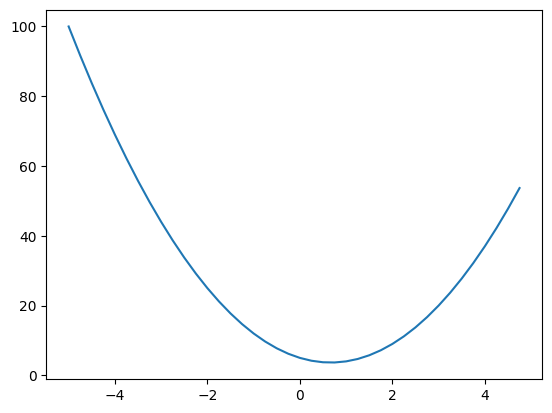

In [4]:
xs = np.arange(-5,5,0.25)
ys = f(xs)

plt.plot(xs, ys)

In [5]:
h = 0.0000001
x = 2/3
(f(x+h)-f(x))/h

2.9753977059954195e-07

In [6]:
a = 2.0
b = -3.0
c = 10.0
d = a*b +c
print(d)

4.0


In [2]:

h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b +c
c+=h
d2 = a*b +c

print("d1",d1)
print("d2",d2)

print('slope', (d2-d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [3]:
class Value:

    def __init__(self, data, _children=(),_op='',label = ""):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None  # placeholder for backward method
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data , (self,other),"+")
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data ,(self,other),"*")
        
        def _backward():
            self.grad += other.data* out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward

        return out
  
    
    def __rmul__(self, other):
        return self * other
    
    def __truediv__(self, other):
        return self * other**-1
    
    def __neg__(self):
        return self * -1
    
    def __sub__(self, other): # self - other
        return self + (-other)

    def __radd__(self, other): # other + self
        return self + other
    

    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")
        def _backward():
            self.grad += (1- t**2) * out.grad
        
        out._backward = _backward

        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x),(self,), "exp")

        def _backward():
            self.grad += out.data * out.grad

        out._backward = _backward
                    
        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)

        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

In [4]:
a = Value(2.0)
b = Value(3.0)
a - b

Value(data=-1.0)

In [5]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    # dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f }" % (n.label,n.data,n.grad), shape='record')

    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

we already know 

L = d*f
dL/dd = ?

dL w.r.t to dd we are gonna increment d with h

(f(x+h)-f(x))/h
((d+h)*f)-(d*f)/h
d*f+h*f-d*f/h
h*f/h
f

dL/dd = f  (f = -2.0)
dL/dd = -2.0

same for dL/df would be d which equals to 4.000
dL/df = 4.00

dd/dc = ?


d = c+e

(f(x+h)-f(x))/h
so w.r.t to c 
((c+h+e) -(c+e))/h
c+h-e-c-e/h
1.0

dd/dc = 1.0

same for dd/de as well dd/de = 1.0


chain rule of derivate dL/dc = (dL/dd)*(dd/dc)
chain rule of derivate dL/de = (dL/dd)*(dd/de)

dL/dc = -2.0*1.0 = -2.0
dL/de = -2.0*1.0 = -2.0



dL/de = -2.0

e = a+b

de/da = b (refer above hoe to derive)
de/da = -3.0

dL/da = (dL/de)*(de/da)
dL/da = -2.0*-3.0
dL/da = 6.0

de/da = a (refer above hoe to derive)
de/da = 2

dL/db = (dL/de)*(de/db)
dL/db = -2.0*2.0
dL/db = -4.0


In [6]:

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

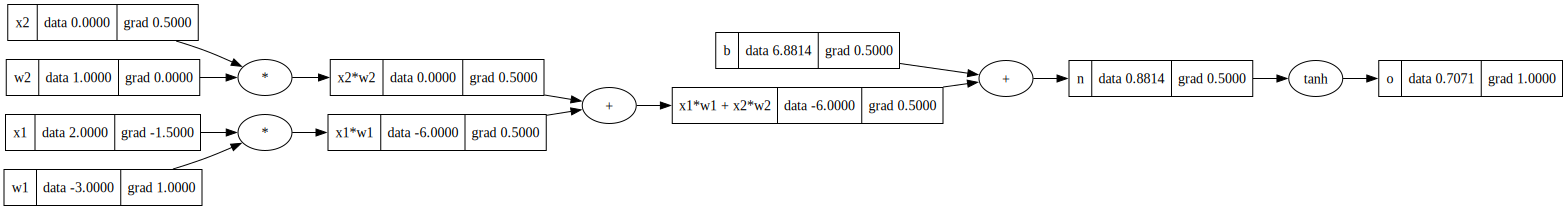

In [7]:
draw_dot(o)

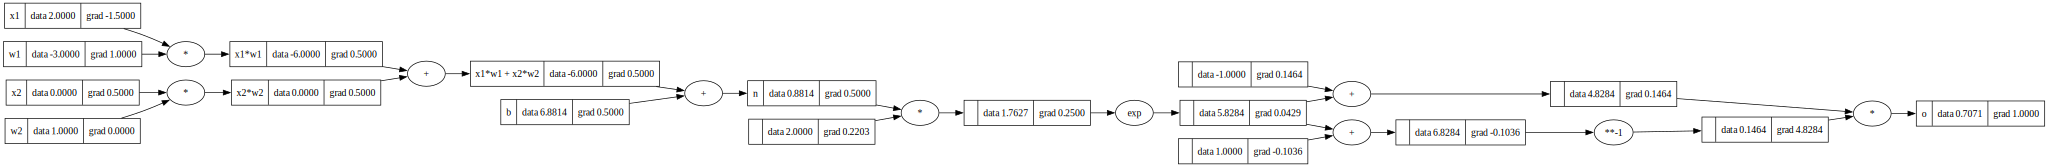

In [128]:

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

e = (2*n).exp()
o = (e - 1) / (e + 1)
o.label = 'o'
o.backward()
draw_dot(o)

o = tanh(x)

do/dn = 1-tanh(x)**2 (from wikipedia)

do/dn = 1-o.data**2 (as we know o.data we place that value here)

"+" makes derivative flow equally


In [1]:
import torch

x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())


0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [25]:
class Neuron:
    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self,x):
        act = sum((wi*xi for wi,xi in zip(self.w,x)),self.b)
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]

class Layer:
    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs  # return single value if only one neuron
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]


class MLP:
    
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(sz)-1)]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]
      

In [26]:

x = [2.0,3.0,-1.0]
n = MLP(3, [4, 4, 1])  # 3 inputs, 4 neurons in first layer, 4 in second layer, 1 output
n(x)

Value(data=0.2158773733870797)

In [27]:
n.parameters()

[Value(data=0.13750616763539414),
 Value(data=-0.780801030927033),
 Value(data=-0.9863569500630851),
 Value(data=0.8384914342612311),
 Value(data=0.5392842534562374),
 Value(data=-0.3118571675345385),
 Value(data=-0.31199196724578004),
 Value(data=-0.060128605688675174),
 Value(data=0.16453220311577832),
 Value(data=0.9370724068369654),
 Value(data=0.8491249876323683),
 Value(data=0.678425270331785),
 Value(data=-0.3251242670202874),
 Value(data=0.8142261545216347),
 Value(data=-0.08250475173179916),
 Value(data=0.06637203572489625),
 Value(data=0.8787765188855756),
 Value(data=-0.9721827105706116),
 Value(data=-0.19696347872106368),
 Value(data=0.6810762159556416),
 Value(data=-0.6218662619995621),
 Value(data=0.47831730681239715),
 Value(data=0.8665028041071632),
 Value(data=0.0851753897905898),
 Value(data=-0.4432828269637983),
 Value(data=-0.6892142875492242),
 Value(data=-0.45145226615300516),
 Value(data=-0.7554269419767636),
 Value(data=0.7805432164761259),
 Value(data=0.6864211

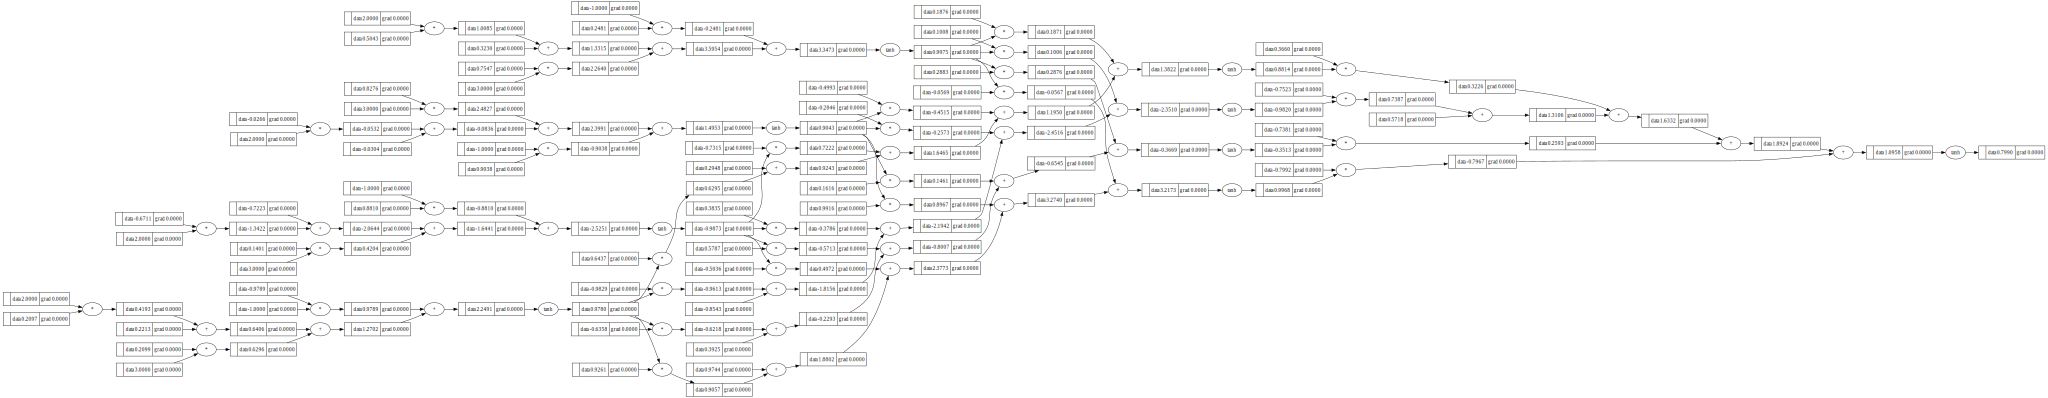

In [18]:
draw_dot(n(x))

In [48]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]

In [116]:
for k in range(20):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)


0 0.00047038682684002754
1 0.0004696505671133822
2 0.00046891653341391937
3 0.0004681847157688672
4 0.0004674551042645914
5 0.0004667276890461861
6 0.00046600246031701376
7 0.0004652794083383168
8 0.00046455852342876247
9 0.0004638397959640112
10 0.0004631232163763426
11 0.00046240877515421044
12 0.0004616964628418263
13 0.00046098627003877095
14 0.00046027818739958207
15 0.00045957220563336916
16 0.0004588683155033891
17 0.00045816650782667815
18 0.000457466773473643
19 0.00045676910336770984


In [117]:
ypred

[Value(data=0.9905561611440421),
 Value(data=-0.9928085109473028),
 Value(data=-0.9865341778445073),
 Value(data=0.9884009858215456)]

In [29]:
loss = sum([(yout - ygt)**2 for ygt,yout in zip(ys,ypred)])
loss

Value(data=3.3952354274077066)

In [105]:
ypred = [n(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt,yout in zip(ys,ypred)])
loss

Value(data=0.0005572755771156936)

In [41]:
loss.backward()

In [42]:
n.layers[0].neurons[0].w[0].grad

-0.1389755764652471

In [43]:
n.layers[0].neurons[0].w[0].data

0.13390336232175173

In [44]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [45]:
n.layers[0].neurons[0].w[0].data

0.1352931180864042